<a href="https://colab.research.google.com/github/mehrnazeraeisi/Diabetes/blob/main/Diabetes_Mean_After_KnnReg_Per_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:

def knn_regression_and_evaluation(dataset, test_size, iterations):
    # تقسیم دیتاست به ویژگی‌ها و برچسب‌ها
    X = dataset.data  # ویژگی‌ها
    y = dataset.target  # برچسب یا هدف

    # ذخیره نتایج برای هر تکرار
    r2_knn_results = []
    mse_knn_results = []
    r2_feature_results = []
    mse_feature_results = []

    # حلقه تکرار برای ارزیابی
    for _ in range(iterations):
        # تقسیم داده به مجموعه آموزش و تست
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)  # random_state=None for random splits



        # مدل KNN رگرسیون معمولی
        knn_model = KNeighborsRegressor(n_neighbors=5)
        knn_model.fit(X_train, y_train)

        # پیش‌بینی با مدل KNN
        y_pred_knn = knn_model.predict(X_test)

        # محاسبه R2 و MSE برای KNN رگرسیون معمولی
        r2_knn = r2_score(y_test, y_pred_knn)
        mse_knn = mean_squared_error(y_test, y_pred_knn)

        r2_knn_results.append(r2_knn)
        mse_knn_results.append(mse_knn)

        # متغیر برای ذخیره پیش‌بینی نهایی هر عضو تست
        final_predictions = []

        # حلقه روی اعضای تست
        for i in range(X_test.shape[0]):
            feature_predictions = []  # پیش‌بینی‌ها بر اساس ویژگی‌ها

            for j in range(X_train.shape[1]):  # حلقه روی ویژگی‌ها
                # ساخت مجموعه جدید با مشخصات ویژگی مورد نظر
                X_feature = np.delete(X_train, j, axis=1)
                y_feature = y_train

                knn = KNeighborsRegressor(n_neighbors=5)
                knn.fit(X_feature, y_feature)

                # پیش‌بینی برای ویژگی j با داده تست
                test_instance = np.delete(X_test[i], j)
                prediction = knn.predict(test_instance.reshape(1, -1))
                feature_predictions.append(prediction[0])

            # محاسبه میانگین پیش‌بینی‌ها برای عضو تست
            final_prediction = np.mean(feature_predictions)
            final_predictions.append(final_prediction)

        # محاسبه R2 و MSE برای پیش‌بینی‌ها نهایی
        r2_final = r2_score(y_test, final_predictions)
        mse_final = mean_squared_error(y_test, final_predictions)

        r2_feature_results.append(r2_final)
        mse_feature_results.append(mse_final)

    # رسم نمودارها
    x_ticks = np.arange(1, iterations + 1)

    # رسم نتایج R2
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x_ticks, r2_knn_results, 'o-', label='Regular KNN R^2', color='blue')
    plt.plot(x_ticks, r2_feature_results, 's-', label='Feature-wise KNN R^2', color='orange')
    plt.xlabel('Iteration')
    plt.ylabel('R^2 Score')
    plt.title('R^2 Score Comparison')
    plt.axhline(0, color='gray', linestyle='--')
    plt.legend()
    plt.grid()

    # رسم نتایج MSE
    plt.subplot(1, 2, 2)
    plt.plot(x_ticks, mse_knn_results, 'o-', label='Regular KNN MSE', color='blue')
    plt.plot(x_ticks, mse_feature_results, 's-', label='Feature-wise KNN MSE', color='orange')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.title('MSE Comparison')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


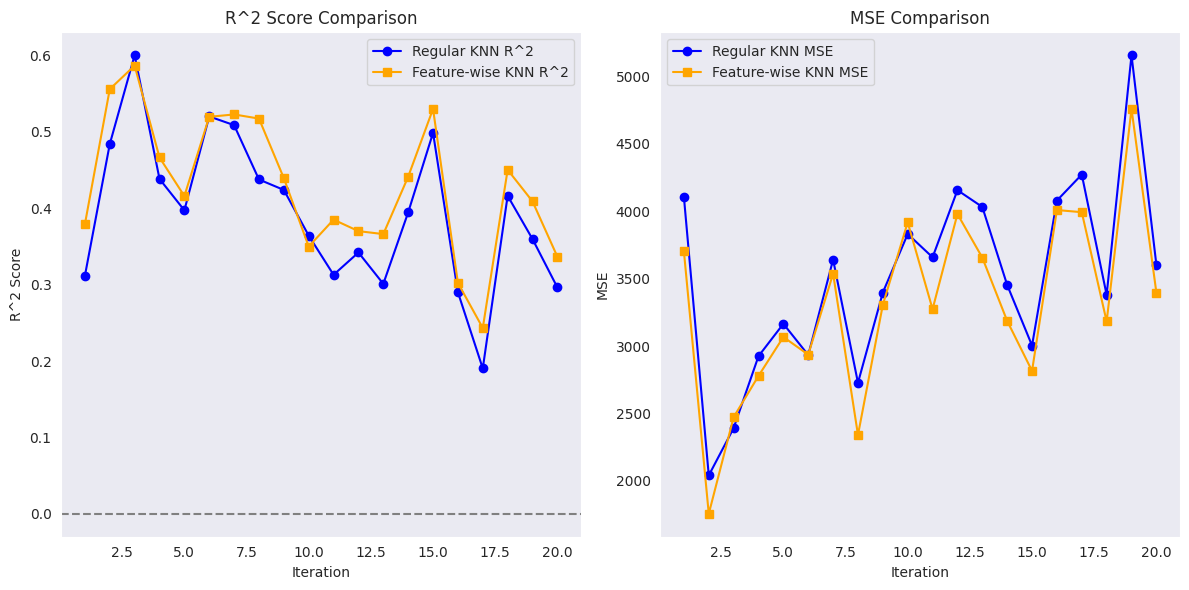

In [ ]:
# بارگذاری دیتاست دیابت
diabetes_dataset = datasets.load_diabetes()

# استفاده از تابع برای ارزیابی KNN روی دیتاست دیابت
knn_regression_and_evaluation(diabetes_dataset, test_size=0.13   , iterations=20)

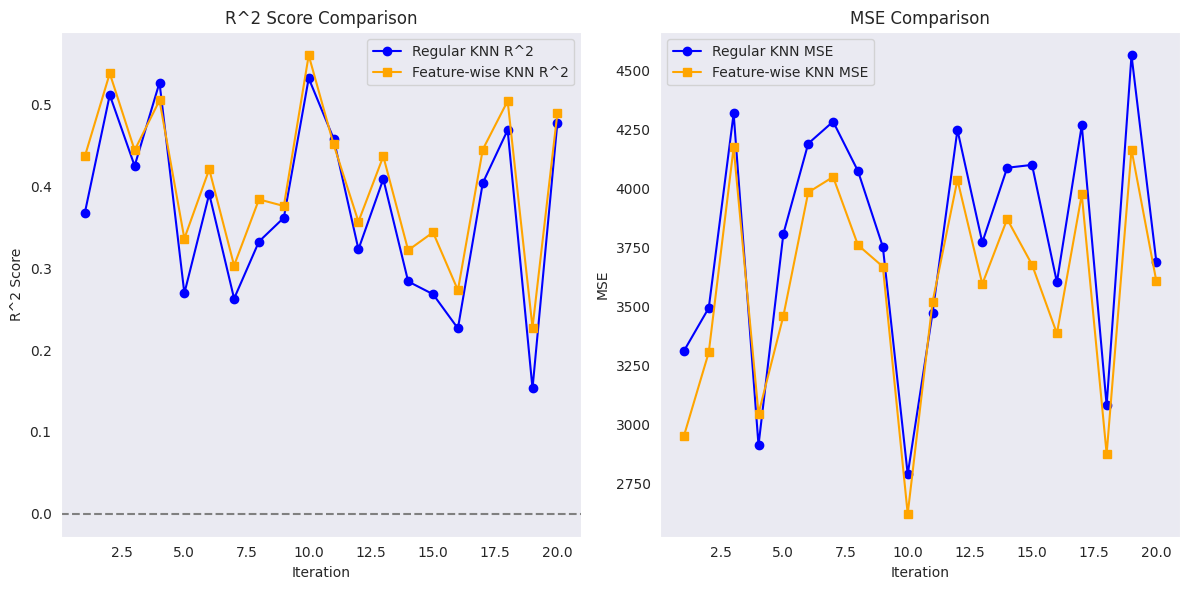

In [ ]:
# بارگذاری دیتاست دیابت
diabetes_dataset = datasets.load_diabetes()

# استفاده از تابع برای ارزیابی KNN روی دیتاست دیابت
knn_regression_and_evaluation(diabetes_dataset, test_size=0.16   , iterations=20)

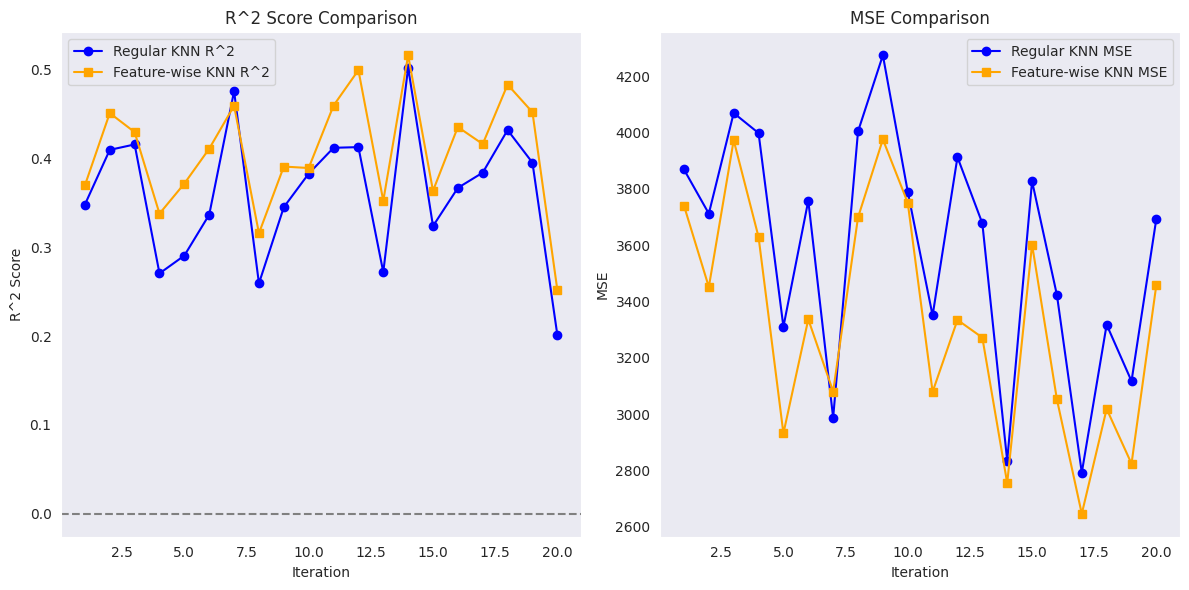

In [ ]:
# بارگذاری دیتاست دیابت
diabetes_dataset = datasets.load_diabetes()

# استفاده از تابع برای ارزیابی KNN روی دیتاست دیابت
knn_regression_and_evaluation(diabetes_dataset, test_size=0.20   , iterations=20)